#### POLICE SHOOTINGS IN THE US - Order and chaos

WHAT IS HAPPENING?

### Executive Summary

In the debate over high number of shootings by police in America (compared to similar countries), concerning the part of the situation that police is indeed responsible for (as opposed to factors as the singularities of America's threats), there are very different opinions as to the root police behaviour. Two major ideas are that 

- "Police resort to lethal force in an 'non-optimal' way, too easily, which speaks of incompetence compared to their counterparts in other countries, OR criminal lack of consideration for sanctity of life", and 
- "Police are even consciously taking refuge in their position to kill, whether in 'passionate acts' like 'fits of rage' (commonly mentioned in convicting rulings), or more factors". 
The racism factor alleged by movements like Black Lives Matter could play in both cases, as police may both intentionally target racial groups or value their lives less relatively speaking.

A problem until recently has been the lack of data to look into that question. Two projects by newspapers, started in 2015 and with data starting from the same year, have been mentioned by the FBI as quite comprehensive sources of data on the subject, prompting the FBI to announce a recording system based on their methodology. I anchored my study on the dataset provided by the Washington Post (checking against data from the Guardian's project that should match the one from the WP), because it focused both in scope and depth on the type of deaths of interest for my own capstone project scope (shootings, excluding deaths in custody and more).

---
I used three global types of variables: (a) discriminant factors allowing us to infer that police failure in a case is more likely compared to standard cases, (b) characteristics of victim (age_group, race, gender), (c) context variables (state, city, time of the year).

My goals were to 1) modify & create variables as needed (using NLP if needed) to organize the data with the factors suggesting criminality, 2) use clustering techniques to further uncover insights in the killings (beyond what basic descriptive techniques can do), and 3) see if higher relative numbers of killings are correlated with levels of violent crime, as an alternative approach.



---
In the unsupervised part, I find that although the total amount of conspicuous cases make a very small proportion of the total, victims who are Black are the single racial group with the most of such "conspicuous" cases by all my pre-chosen proxy factors. The application of clustering techniques to variables connected to behaviour of the victims during contact with police also bore fruit in further uncovering groups within the armed group:

However, the implications from using such proxies remain limited. Thus, the limitations of data available to examine justifiability was made clear (crowdsourced media information lacks access to the information investigators and law enforcement agents have). Design of the recording system that American authorities are working on cannot solely rely n such crowdsourcing: the issue of underreporting by police entities must be looked into.

In the supervised part of my analysis, I used the raw data reported by the FBI by law enforcement agencies. This data was found later down the line to be incomplete because not all existing agencies do report. I found total violent crime rates and police shootings rates to be somewhat correlated (37%) at the state level (Spearman's rank correlation). Although I did not get to replicate this insight using linear regression, the priority is first starting again with the data the FBI provides including state-level estimates, which I was not aware of at the beginning. Indeed, my working assumption was that the rate of crime to total represented population ("population_for_agencies") was the same as the rate to total state population, but that need not be true.

__[IMPORTANT DISCLAIMER: The data used for examination of the "fleeing felon cases" (in the "fleeing?" column) was later found to show multiple inconsistencies. Use of the data or of the results derived from it should not be done until further review is done]__

---

### Table of contents


- __Approach__

- __Goal__

__I) Goal : modifying & creating variables when needed (using NLP if needed) to organize the data with the factors suggesting criminality__

- - About the variables

- __Data Acquisition__
- - Identifying cases where unarmed victims were likely to be suspects of previous violent crime
- - Basic information retrieval based on keywords

__II) Goal: uncover insights in the killings with unsupervised techniques__

- __2015 to 2016 (excl. December) difference -basic descriptive enquiry__

- __Race profile for these groups (basic descriptive enquiry)__
- - Results
- - Discussion

- __Hierarchical Clustering__
- - Data transformation
- - Forming linkage matrix
- - What clusters do we have?
- - Discussion
- - - A more representative dissimilarity metric?

__III) Supervised part: Are higher relative numbers of killings mostly correlated to the levels of violent crime?__

- - Standardising Police Shootings
- - Distribution of variables
- - Scatter plot with total violence explaining police shootings
- - Statistical Correlation
- - Models
- - Results
- - Discussion

---

### Approach

I anchor my study on the dataset provided by the Washington Post (checking against data from the Guardian's project that should match the one from the WP). 

- Database of the Washington Post (I used also links present on their github to their AWS database, where data like case description and news sources was available in json format):
- - https://github.com/washingtonpost/data-police-shootings
- - 2015 https://s3.amazonaws.com/postgraphics/policeshootings/policeshootings2015.json
- - 2016 https://s3.amazonaws.com/postgraphics/policeshootings/policeshootings2016.json
- The Counted (from the Guardian)
- - https://www.theguardian.com/us-news/ng-interactive/2015/jun/01/about-the-counted


These projects, started in 2015 & with data starting from the same year, are the most reliable available source of data on the subject, prompting the FBI to announce a recording system based on their methodology.

The variables available are the following:

In [44]:
#variables available in WP data:
json.drop(["index"], axis=1).head(1)

,age,armed,blurb,city,date,description,editor_note,flee,gender,is_body_camera,is_geocoding_exact,is_officer_charged,lat,lon,mental,name,race,full_state,threat_level_display,weapon
0,53.0,gun,"a 53-year-old man of Asian heritage armed with a gun, was shot on Jan. 2, 2015, in a house in Shelton, Wash.",Shelton,2015-01-02,"Elliot, who was on medication for depression, threatened suicide and then threatened to shoot a Mason County Sheriff's deputy.",,NOT,M,False,True,False,47.246826,-123.121592,True,Tim Elliot,A,Washington,attack,DEADLY


(One of the newspapers behind these projects have announced that they will put an end to their project after 2016, considering to have fulfilled their role. However, this information by itself does not inform even on whether 'police performance' is getting worse or not from one year to another: less people were confirmed to have been shot in 2016 than in 2015, but perhaps it is matched by a decrease in violent crime?)

__I try to investigate this 'police performance'.__

---

I identify two types of variables: (a) "discriminant factors" allowing us to infer that police failure in a case is likely, and (b) "other", with characteristics of the victim & more.

__Using these discriminating factors, assessing differences in frequency relative to the type (b) "race" variable could do to look into the racism question (probably going to single "black" since they are making the claim). Absence of significant differences would probably argue in favour of the first opinion mentioned above to explain police criminal use of force.__

(I use these factors in a proxy logic, they are obviously not proof of police failure)

Main literature support for evidence of/discriminant factors pointing to police failure:
_"Thousands dead, few prosecuted"_
: 54 criminal prosecutions identified by criminologist and WPost
http://www.washingtonpost.com/sf/investigative/2015/04/11/thousands-dead-few-prosecuted/ (article)
https://www.washingtonpost.com/graphics/investigations/police-shootings/ (list of cases)
(just support, did not go into depth or stick to that (unneeded for my purposes))


my chosen discriminant factors: 

- presence of a weapon?
- if victim was fleeing, was threat level evidence substantial? (criminal to shoot at fleeing person unless evidence of high level danger)*
- whether the officer was charged is a similar indicator (whether they were convicted or not) as prosecutors rarely try: it points to such circumstances as I am using here

(given variables: armed, threat_level_display, flee, is_officer_charged) + descriptions & news sources

The text information would seem to provide most relevant information in investigating a killing (identifying car stops, whether the victim made use of their weapon, etc). Due to time I used NLP to extract whatever information is key, for use either/both within the unsupervised (extra variables to cluster by) or/and supervised part of my analysis, as useful.

----




*APPENDIX on fleeing felon cases:

United States Supreme Court caselaw TENNESSEE v. GARNER, (1985), is the document stating "fleeing felon rule" is to be balanced against reasonable.
As mentioned in it when examining prevailing rules:
"_[the] suspect committed felony involving use or threat of physical force likely to cause death or serious injury, and is likely to endanger life unless apprehended without delay_".

Also interesting is the mentioned requirement for an "articulable basis to think [a suspect is] armed":
"_The court did find, however, that Garner appeared to be unarmed, though Hymon could not be certain that was the case. [...] Restated in Fourth Amendment terms, this means Hymon had no articulable basis to think Garner was armed_"

### Goal: 
- 1) modifying & creating variables when needed (using NLP if needed) to organize the data with the factors suggesting criminality
- 2) using clustering techniques to further uncover insights in the killings (beyond what basic descriptive techniques can do)
- 3) supervised part: hopefully building on the findings from the first part, but core analysis would be looking to see if higher relative numbers of killings are correlated with levels of violent crime. With statistically validated findings

N.B.: I would have examined the trends in the police shootings against that in crime levels from 2015 to 2016, with that for lack of data about crime levels in 2016 (the 2016 issue of the Uniform Crime Report from the FBI, which is the source of data for this, has not yet been released).

The supervised part is in line with investigating "police performance": again, the null hypothesis would be that indeed higher relative numbers of killings (including that of "non-criminal" victims, could be put down to alertness) are positively correlated with levels of violent crime.

----

----

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from pandas.io import sql
import scipy.stats as stats
import seaborn as sb

__Loading cleaned data from my local database__

In [6]:
connect_param = 'postgresql://macowner@localhost:5432/macowner'
engine = sqlalchemy.create_engine(connect_param)

df2015=sql.read_sql("""SELECT "age","name","armed", "description", "is_officer_charged", "city", "race", "full_state", "threat_level", "fleeing?", "date_in_year", "month", "day_of_month", "suspect?", "flee" FROM wp_json2015;""", engine)

In [3]:
df2016=sql.read_sql("""SELECT "age","name","armed", "city", "race", "full_state", "threat_level", "fleeing?", "date_in_year", "month", "day_of_month", "suspect?", "flee" FROM wp_json2016;""", engine)

In [16]:
#dataset that include text summaries:
json=pd.read_json('https://s3.amazonaws.com/postgraphics/policeshootings/policeshootings2015.json')

---

### I) Goal : modifying & creating variables when needed (using NLP if needed) to organize the data with the factors suggesting criminality

__About the variables__

The threat level variable was specially constructed for the analysis behind a story by the Washington Post (http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/). They state: 
"To identify trends among fatal shootings by police, The Post studied whether the individuals killed were unarmed or armed with weapons and reviewed the actions they took in the immediate moments before police shot them."

- the "attack" value corresponds to cases where the individuals had already 1) fired shots, 2) brandished a gun or 3) started an attack on a person with a weapon or their bare hands.
- "other" groups all other cases (they mention at least two distinct groups within (one of whom includes people holding non-firearm weapons) in their story, but they do not provide this information in the data put at our disposition).
- "undetermined" are cases where the Washington Post was unable to determine the circumstances of the shootings because of limited information or ongoing investigations

With given columns:
- (1) officer was charged; (2) unarmed; (3) unarmed + fleeing (FOOT or CAR) --> fleeing felon rule, "FELONY suspect posing a significant threat of death or serious physical injury to the officer or others"?;  
- characteristics of victim/case: age_group, race.
- I use State, city, date as a _separate kind of information_ rather than together with the characteristics of the case (the idea is that I can map clusters of victims on the US map (Tableau), or across the year). Including the date as a clustering variable was overcrowding all the other features

I did some scraping and basic NLP to retrieve information about whether the victim, if unarmed, was a suspect for some violent crime. 

(Although I planned to use NLP for the "flee" column as well, which was shown to be inconsistent for my purposes during my EDA (the description/source articles show that sometimes the victim INITIALLY fled but then was killed while fighting back), it emerged upon examination that the cases combining the characteristics of a "fleeing felon case" were few enough to check manually.)

### Data Acquisition

__Identifying cases where unarmed victims were likely to be suspects of previous violent crime__

In [30]:
import requests
import bs4
import re
from bs4 import BeautifulSoup

In [9]:
pd.options.display.max_columns=500
pd.options.display.max_rows=1500
pd.options.display.max_colwidth=1000

Code for 2015 only (it is the same for 2016) 

In [24]:
json[["name","armed","sources"]][json.armed=="unarmed"].head(2)

,name,armed,sources
2,John Paul Quintero,unarmed,"[{u'url': u'http://www.kwch.com/news/local-news/father-of-a-man-shot-killed-by-a-police-officer-says-his-son-did-not-deserve-to-die/30625880', u'source_name': u'kwch.com', u'type': u'NEWS', u'title': u'Father of a man shot, killed by police speaks out'}, {u'url': u'http://www.kansas.com/news/local/article5498046.html', u'source_name': u'kansas', u'type': u'NEWS', u'title': u'Wichita police release 911 calls in fatal shooting involving officers'}]"
8,Autumn Steele,unarmed,"[{u'url': u'http://patch.com/iowa/iowacity/police-cop-aims-dog-kills-woman-instead', u'source_name': u'Iowa City, Iowa Patch', u'type': u'NEWS', u'title': u'Police: Cop Aims at Dog, Kills Woman Instead'}, {u'url': u'http://www.desmoinesregister.com/story/news/2015/02/26/dog-police-shooting-vicious-burlington/24078037/', u'source_name': u'Des Moines Register', u'type': u'NEWS', u'title': u'Dog in police shooting ruled not vicious'}, {u'url': u'http://www.usatoday.com/story/news/nation/2015/03/24/cop-accidentally-shot-woman-back-work/70406706/', u'source_name': u'USA TODAY', u'type': u'NEWS', u'title': u'Cop who accidentally shot woman could be back at work'}]"


In [25]:
#sources' urls for unarmed_15
sources=pd.DataFrame(json["sources"].apply(lambda x:[y["url"] for y in x]).tolist())
for col in sources.columns:
    json["source_"+str(col)]=sources.loc[:,col]

In [28]:
json[["name","armed",'source_0','source_1','source_2','source_3','source_4']].head()

,name,armed,source_0,source_1,source_2,source_3,source_4
0,Tim Elliot,gun,http://kbkw.com/suicidal-shelton-man-dies-after-confronting-responding-deputies/,http://kmasnewsradio.com/news/local-state-news/21013-fatal-shooting-justified-by-ciit,None,None,None
1,Lewis Lee Lembke,gun,http://www.oregonlive.com/aloha/index.ssf/2015/01/aloha_man_killed_in_police-inv.html,http://www.oregonlive.com/aloha/index.ssf/2015/01/aloha_man_fatally_shot_by_depu.html,http://www.oregonlive.com/aloha/index.ssf/2015/01/washington_county_sheriffs_dep_3.html,http://www.co.washington.or.us/News/SONews/upload/PR150305-5-District-Attorney-Review-Concerning-Officer-Involved-Shooting.pdf,http://koin.com/2015/03/06/da-deputy-shooting-of-aloha-man-justified/
2,John Paul Quintero,unarmed,http://www.kwch.com/news/local-news/father-of-a-man-shot-killed-by-a-police-officer-says-his-son-did-not-deserve-to-die/30625880,http://www.kansas.com/news/local/article5498046.html,None,None,None
3,Matthew Hoffman,toy weapon,http://sf-police.org/index.aspx?recordid=1101&page=3763,http://www.sfweekly.com/thesnitch/2015/01/07/matthew-hoffman-man-killed-by-cops-had-sent-text-messages-to-officers-asking-disturbing-questions,http://www.sfweekly.com/thesnitch/2015/01/05/cops-kill-man-armed-with-replica-gun,None,None
4,Michael Rodriguez,nail gun,http://www.coloradoan.com/story/news/local/windsor/2015/01/09/man-idd-evans-officer-involved-shooting/21407471/,http://www.westword.com/news/no-charges-in-michael-rodriguez-police-shooting-fourth-in-eight-months-6582711,http://www.greeleytribune.com/news/14528032-113/police-medina-business-bob,None,None


In [ ]:
#I retrieve the html for each page and insert it at the same position in a copy table

def scraper(URL):
    if URL==None:
        pass
        return
    else:
        r=requests.get(URL)
        soup = BeautifulSoup(r.content)
    
        return soup.prettify()
    
df2015_with_info=json.copy()
for source_col in ['source_0','source_1','source_2','source_3','source_4']:
    df2015_with_info[source_col]=df2015_with_info[source_col].head(5).apply(scraper)

In [ ]:
#storing scraped original info
scraped_info=df2015_with_info
#data I move on with
df2015_with_info=scraped_info.copy()

Once I have the pages, I proceeded to extracting information from all the text in the html: this allowed me not to be concerned with the different html code each news source uses for their article.

I searched for the name of the victim, which, wherever it appeared, was only enclosed with useful information (I restricted retrieval to the text around the name and enclosed by tag symbols (< >...< >)), and I compiled all matches.

In [ ]:
#searching the pages (mainly the article) for information

def extractor(article, term_to_search):

    if (article!= None) & (type(article)!= float): #just for NaNs
    
        #removing paragraph tags
    
        article=article.replace("<p>"," ")
        article=re.sub("<p class=\"paragraph\"[^>]*>" , " ", article)
        article=article.replace("</p>"," ")

        #finding article text (and related text) 
        my_regex = '[^>]*' + re.escape(term_to_search) + '[^<]*'
        #this searches text contained between the tag symbols '>' & '<' for the term_to_search
        #re.escape is to escape any special characters
        

        information=""
        for match in re.findall(my_regex, article, re.DOTALL):
            if ("{" not in match) & ("=" not in match):
                information+=match

        return information
    else:
        pass
        return

Tthe name of the dead was not always present in at least one of the news articles reporting it, but this was just to obtain extra information: all cases have at least a one to two description with some relevant information.

__Basic information retrieval based on keywords__

In [ ]:
df2015_with_info["matches"]=0
for source_col in ['description_y','source_0','source_1','source_2','source_3','source_4']:
    for name in df2015_with_info.index:
        if df2015_with_info.loc[ind,source_col]==None:
            pass
        
        elif df2015_with_info.loc[ind,source_col]=="":
            pass
        
        else:
        
            for word in [" murder", "homicide","robbery","aggravated assault"," rape "]:
                if word in df2015_with_info.loc[ind,source_col]:
                    df2015_with_info.loc[ind,"suspect?"]+=1
        

I also manually investigated the presence of the substring "suspect" manually (little number of cases).
For example, in 2015, they were 4 matches out of just 7 cases for 2015 (and 0 out of 6 in 2016).

_Result_

In total, about 12.90% of the unarmed victims in 2015 were returned as such suspects of former crimes, and 6.52% in 2016.

### II) Goal: uncover insights in the killings with unsupervised techniques

Examined groups:

- (1) officer was charged; 
- (2) unarmed; 
- (3) unarmed + fleeing (FOOT or CAR) --> fleeing felon rule, "FELONY suspect posing a significant threat of death or serious physical injury to the officer or others"?;

In [5]:
from scipy.stats import chisquare

I use the Chi Square test as a statistical test throughout, but only were all frequencies are large enough for use (>5), as per the recommendation in the scipy documentation.

### 2015 to 2016 (excl. December) difference -basic descriptive enquiry 

__(1) Officer was charged__

 (only available for 2015 data)

__(2) Unarmed__

2015

In [170]:
float(df2015[(df2015["armed"]=="unarmed")].shape[0])/float(df2015.shape[0])

0.09283551967709384

2016

In [171]:
float(df2016[(df2016["armed"]=="unarmed")].shape[0])/float(df2016.shape[0])

0.05084745762711865

_Chi-Square Test_

In [172]:
chisquare([(137 * float(df2015[(df2015["armed"]=="unarmed")].shape[0]) / float(df2015.shape[0])),
           (137 * float(df2016[(df2016["armed"]=="unarmed")].shape[0]) / float(df2016.shape[0]))])

Power_divergenceResult(statistic=1.6809968872251406, pvalue=0.19479204231005676)

No significant difference.

__(2v2) Unarmed dead case not featuring an attack nor a violent crime suspect__

2015

In [174]:
float(df2015[(df2015["armed"]=="unarmed") 
         & (df2015["threat_level"]=="other") 
         & (df2015["suspect"]==0)].shape[0])/float(df2015.shape[0])

0.044399596367305755

2016

In [175]:
float(df2016[(df2016["armed"]=="unarmed") 
         & (df2016["threat_level"]=="other") 
         & (df2016["suspect"]==0)].shape[0])/float(df2016.shape[0])

0.01807909604519774

### Race profile for these groups (basic descriptive enquiry)

In [6]:
df_whole=pd.concat([df2015.drop(["is_officer_charged", "description"], axis=1), df2016], ignore_index=True)

In [69]:
df_wh_top_3_races=df_whole[(df_whole["race"]=="W") 
         | (df_whole["race"]=="B") 
         | (df_whole["race"]=="H")]

df2015_t2=df2015[(df2015["race"]=="W") 
         | (df2015["race"]=="B")]


- W: White
- B: Black
- H: Hispanic
- A: Asian or Pacific Islander
- N: Native American
- O: Other

__(0) whole dataset__


In [7]:
df_whole.race.fillna(value="?").value_counts()

W    965
B    481
H    330
A     28
N     28
O     25
?     19
Name: race, dtype: int64

_All races_

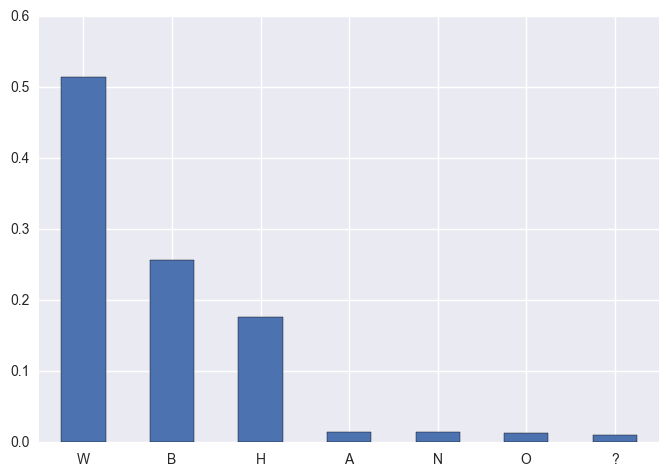

In [11]:
df_whole.race.fillna(value="?").value_counts(normalize=True).plot.bar(rot=0)
plt.show()

_For the subsequent Chi-Square tests_

_1) Whole group_

In [18]:
overall_group_proportions = df_whole.race.fillna(value="?").value_counts(normalize=True).tolist()
group_proportions_2015 = df2015.race.fillna(value="?").value_counts(normalize=True).tolist()

print "The values saved in the variable overall_group_proportions:"
print overall_group_proportions


The values saved in the variable overall_group_proportions:
[0.51439232409381663, 0.25639658848614072, 0.17590618336886993, 0.014925373134328358, 0.014925373134328358, 0.013326226012793176, 0.010127931769722815]


_2) Top 3 group_

In [70]:
t3_group_proportions = df_wh_top_3_races.race.fillna(value="?").value_counts(normalize=True).tolist()
t2_group_proportions_2015 = df2015_t2.race.fillna(value="?").value_counts(normalize=True).tolist()

print "The values saved in the variable t3_group_proportions:"
print t3_group_proportions

The values saved in the variable t3_group_proportions:
[0.54335585585585588, 0.27083333333333331, 0.1858108108108108]


__(1) Officer was charged__ (only available for 2015 data)

In [195]:
df2015[df2015.is_officer_charged].shape[0]

11

In [196]:
df2015[df2015.is_officer_charged].race.fillna(value="?").value_counts(normalize=True)

B    0.545455
W    0.454545
Name: race, dtype: float64

_Proportion with respect to whole race group in dataset_

In [197]:
(df2015[df2015.is_officer_charged].race.value_counts()
 /df2015.race.fillna(value="?").value_counts()).sort_values(ascending=False)

B    0.023256
W    0.009804
?         NaN
A         NaN
H         NaN
N         NaN
O         NaN
Name: race, dtype: float64

__(2) Unarmed__

In [198]:
df_whole[(df_whole["armed"]=="unarmed")].shape[0]

137

In [179]:
float(df_whole[(df_whole["armed"]=="unarmed")].shape[0])/float(df_whole.shape[0])

0.0730277185501066

In [37]:
df_whole[(df_whole["armed"]=="unarmed")].race.fillna(value="?").value_counts()

B    55
W    52
H    24
O     4
N     2
Name: race, dtype: int64

In [200]:
df_whole[(df_whole["armed"]=="unarmed")].race.fillna(value="?").value_counts(normalize=True)

B    0.401460
W    0.379562
H    0.175182
O    0.029197
N    0.014599
Name: race, dtype: float64

_Proportion with respect to whole race group in dataset_

In [66]:
(df_whole[(df_whole["armed"]=="unarmed")].race.fillna(value="?").value_counts()
/df_whole.race.fillna(value="?").value_counts()).sort_values(ascending=False)

O    0.160000
B    0.114345
H    0.072727
N    0.071429
W    0.053886
?         NaN
A         NaN
Name: race, dtype: float64

_Chi-Square test_

In [181]:
f_obs_2t3= [52, 55, 24] #frequencies of unarmed deceased by racial group

In [182]:
total_positives=df_wh_top_3_races[(df_wh_top_3_races["armed"]=="unarmed")].shape[0]

chisquare(f_obs_2t3,f_exp=([x * total_positives for x in t3_group_proportions]))

Power_divergenceResult(statistic=15.913273824225852, pvalue=0.00035032932681900147)

We can reject the null hypothesis.

__(2v2) Unarmed dead case not featuring an attack nor a violent crime suspect__

In [223]:
df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["threat_level"]=="other") 
         & (df_whole["suspect"]==0)].shape[0]

60

In [224]:
df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["threat_level"]=="other")
         & (df_whole["suspect"]==0)].race.value_counts()

B    24
W    23
H     9
O     3
N     1
Name: race, dtype: int64

In [225]:
df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["threat_level"]=="other")
         & (df_whole["suspect"]==0)].race.value_counts(normalize=True)

B    0.400000
W    0.383333
H    0.150000
O    0.050000
N    0.016667
Name: race, dtype: float64

_Proportion with respect to whole race group in dataset_

In [226]:
(df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["threat_level"]=="other")
         & (df_whole["suspect"]==0)].race.value_counts()
/df_whole.race.fillna(value="?").value_counts()).sort_values(ascending=False)

O    0.120000
B    0.049896
N    0.035714
H    0.027273
W    0.023834
?         NaN
A         NaN
Name: race, dtype: float64

_Chi-Square test_

In [75]:
f_obs_2v2 = [23, 24, 9]

In [314]:
total_positives=df_wh_top_3_races[(df_wh_top_3_races["armed"]=="unarmed") 
         & (df_wh_top_3_races["threat_level"]=="other") 
         & (df_wh_top_3_races["suspect"]==0)].shape[0]

chisquare(f_obs_2v2, f_exp=([x * float(total_positives) for x in t3_group_proportions]))

Power_divergenceResult(statistic=7.1477817519268303, pvalue=0.028046515594389469)

We can reject the null hypothesis.

__[IMPORTANT NOTE: The data used here (in the "fleeing?" column) was later found to show multiple inconsistencies. The results in the section underneath (3 and 3v2) cannot be used until further review is done]__

__(3) Unarmed fleeing felon case__ 

In [206]:
df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["fleeing?"]=="YES")].shape[0]

6

In [207]:
df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["fleeing?"]=="YES")].race.fillna(value="?").value_counts()

B    3
W    2
H    1
Name: race, dtype: int64

In [208]:
df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["fleeing?"]=="YES")].race.fillna(value="?").value_counts(normalize=True)

B    0.500000
W    0.333333
H    0.166667
Name: race, dtype: float64

_Proportion with respect to whole race group in dataset_

In [209]:
(df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["fleeing?"]=="YES")].race.fillna(value="?").value_counts()
/df_whole.race.fillna(value="?").value_counts()).sort_values(ascending=False)

B    0.006237
H    0.003030
W    0.002073
?         NaN
A         NaN
N         NaN
O         NaN
Name: race, dtype: float64

__[IMPORTANT NOTE: The data used here (in the "fleeing?" column) was later found to show multiple inconsistencies. The results in the section underneath (3 and 3v2) cannot be used until further review is done]__

__(3v2) Unarmed fleeing felon case not featuring an attack nor a violent crime suspect__

In [227]:
df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["fleeing?"]=="YES") 
         & (df_whole["threat_level"]=="other") 
         & (df_whole["suspect?"]==0)].shape[0]

2

In [228]:
df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["fleeing?"]=="YES") 
         & (df_whole["threat_level"]=="other") 
         & (df_whole["suspect?"]==0)].race.fillna(value="?").value_counts()

B    1
H    1
Name: race, dtype: int64

In [100]:
df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["fleeing?"]=="YES") 
         & (df_whole["threat_level"]=="other") 
         & (df_whole["suspect?"]==0)].race.fillna(value="?").value_counts(normalize=True)

B    0.5
H    0.5
Name: race, dtype: float64

_Proportion with respect to whole race group in dataset_

In [102]:
(df_whole[(df_whole["armed"]=="unarmed") 
         & (df_whole["fleeing?"]=="YES") 
         & (df_whole["threat_level"]=="other") 
         & (df_whole["suspect?"]==0)].race.fillna(value="?").value_counts()
/df_whole.race.fillna(value="?").value_counts()).sort_values(ascending=False)

H    0.003030
B    0.002079
?         NaN
A         NaN
N         NaN
O         NaN
W         NaN
Name: race, dtype: float64

---

__EXTRA : (-1) dead who likely were perpetrating a violent crime__

In [212]:
df_whole[(df_whole["armed"]!="unarmed") 
         & (df_whole["threat_level"]=="attack")].shape[0]

1175

In [213]:
df_whole[(df_whole["armed"]!="unarmed") 
         & (df_whole["threat_level"]=="attack")].race.fillna(value="?").value_counts()

W    632
B    301
H    181
N     16
?     16
O     15
A     14
Name: race, dtype: int64

In [214]:
df_whole[(df_whole["armed"]!="unarmed") 
         & (df_whole["threat_level"]=="attack")].race.fillna(value="?").value_counts(normalize=True)

W    0.537872
B    0.256170
H    0.154043
N    0.013617
?    0.013617
O    0.012766
A    0.011915
Name: race, dtype: float64

_Proportion with respect to whole race group in dataset_

In [215]:
(df_whole[(df_whole["armed"]!="unarmed") 
         & (df_whole["threat_level"]=="attack")].race.fillna(value="?").value_counts()
/df_whole.race.fillna(value="?").value_counts()).sort_values(ascending=False)

?    0.842105
W    0.654922
B    0.625780
O    0.600000
N    0.571429
H    0.548485
A    0.500000
Name: race, dtype: float64

_Chi-Square test_

In [185]:
f_obs_x=[632, 301, 181]

In [315]:
total_positives= float(df_wh_top_3_races[(df_wh_top_3_races["armed"]!="unarmed") 
         & (df_wh_top_3_races["threat_level"]=="attack")].shape[0])

chisquare(f_obs_x,f_exp=([float(x) * total_positives for x in t3_group_proportions]))

Power_divergenceResult(statistic=4.4436616136860767, pvalue=0.10841044843519552)

We can't reject the null hypothesis.

---

__Results__

What we can say:

1) the kind of cases that are often second-guessed by the public make a very small proportions of all the killings, not only by the "unarmed" variable (which has been shown already by journalists working with the source dataset). This one makes but 7.3% of the whole (The proportion of unarmed shot people decreased from 9.28% to 5.08% from 2015 to 2016, but the difference is not statistically significant). The groups I defined myself examined captured limited numbers. That was to be expected since they build on the already marginal "unarmed" group. Their size is however too small for application of the Chi-Square test.

2) By all but one of the proxies used, there are notable differences between races in the dataset as to the proportion of cases falling in my discriminant groups, and Black people stand before any single racial group when looking at the proportion of the whole group in the dataset. In other words: _"for the Black people __that were killed__"_ a greater proportion than other races were so in _circumstances for which justifiability would have needed investigation_, by my chosen proxies.
However, only two cases had frequencies large enough for my statistical test (Chi-Square). For the "unarmed cases" group, we can reject the null hypothesis of no difference with p-value = 0.01 and for the "unarmed cases not featuring an attacking person or a violent crime suspect". 

__Discussion__

As a reminder, the implications regarding probability of justifiability that can be derived using these factors, as there are still a plethora of possible circumstances that would argue against racial disadvantage: so far, I have not separated. For example, some "unarmed" shot people were actually collateral victims because of being in cars with people who they were armed and had a confrontation with police. All these factors need be accounted for. 

The general limitations I encountered with my proxies lend weight to the argument that for reliable tools to investigate 'justifiability' of police killings and their interaction with other factors as racial profiles, information available to the public like news data is not enough, and therefore the American authorities (FBI), who only can explore ways of obtaining the needed information from the police agencies, are the ones with a role to play.

I must stress that I am JUST reporting the p-value using the Chi-Square test of variable independence. That was the one statistical test I found for categorical data, but I have yet to research its theoretical weight. I have nevertheless, as stated, sticked by the advice that the frequencies have a particular minimum (equal to 5)).

Looking forward, the proxies that could not be statistically assessed can be as we get data for more years. 

### Hierarchical Clustering

I applied clustering techniques to the variables relative to behaviour of the people shot ("flee", "weapon_groups" and "threat-level"). The "flee" variable values is thus explained:

- "Not fleeing" are cases that did not feature a chase at any point.
- "Car" & "Foot" are cases where the shot person tried to flee from police at some point, either by car or by foot
- "Other" are cases where the question is irrelevant or makes no sense.

The "threat-level" variable values are thus explained:

- the "attack" value corresponds to cases where the individuals had already 1) fired shots, 2) brandished a gun or 3) started an attack on a person with a weapon or their bare hands.
- "other" groups all other cases (they mention at least two distinct groups within (one of whom includes people holding non-firearm weapons) in their story, but they do not provide this information in the data put at our disposition).
- "undetermined" are cases where the Washington Post was unable to determine the circumstances of the shootings because of limited information or ongoing investigations

Clustering techniques use distance to form clusters. For categorical data, alternatives are needed. After exploring different alternatives. I believe hierarchical clustering that will re-use the distance function presented in the paper should be a more effective way to appreciate similarity.

---

__Data transformation__

In [ ]:
#I define groups here rather than modifying the data in the dataset to be able to revert if wanted

In [279]:
df_clust_ = pd.concat([df2015.drop("is_officer_charged", axis=1), df2016], ignore_index=True)

In [280]:
def weapon_groups(weapon):
    if weapon in ["guns and explosives", "gun and knife", "hatchet and gun"]:
        weapon="gun"
    elif weapon=="motorcycle":
        weapon="vehicle"
    elif weapon=="in vehicle with criminal":    
        weapon="unarmed"
    elif weapon in ["baseball bat", "hammer", "Taser", "metal pipe", "screwdriver", "crossbow", "rock", "baton", "metal pole", "brick"                               
,"flashlight","carjack","pole","chain","flagpole","pipe","hand torch","metal object","metal rake","piece of wood","bean-bag gun"
,"contractor's level","beer bottle"]:
        weapon="blunt object"
    elif weapon not in ["gun", "knife", "unarmed", "vehicle","toy weapon", "undetermined", "unknown weapon"]:
        weapon="other"
    return weapon

df_clust_["weapon_groups"]=df_clust_["armed"].apply(weapon_groups)

In [283]:
df_clust=df_clust_.drop(["age", "full_state","age_groups","date_in_year","armed", "description", "city", "name", "month", "day_of_month", "fleeing?", "suspect", "race"], axis=1)

In [284]:
df_clust.head()

,flee,threat_level,weapon_groups
0,Not fleeing,attack,gun
1,Not fleeing,attack,gun
2,Not fleeing,other,unarmed
3,Not fleeing,attack,toy weapon
4,Not fleeing,attack,other


__Forming linkage matrix__

In [285]:
from sklearn import metrics
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import LabelEncoder

In [286]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

In [287]:
#scipy pdist requires label-encoded X values
X=df_clust.copy()
le = LabelEncoder()
for x in X.columns:
    X[x]=le.fit_transform(X[x])

In [288]:
#Basic Dissimilarity measure function, modeled on k-modes

def diss(row1, row2):
    diss=0
    for i1,i2 in zip(row1, row2):
        if i1!=i2:
            diss+=1
        else:
            pass
    return diss 
    
my_metric = pdist(X, (lambda u,v: diss(u,v)))

---------------

In [289]:
Z = linkage(my_metric,'complete') 
#works with single linkage as well,
#but not with 'average linkage'

In [290]:
c, coph_dists = cophenet(Z, my_metric)
c

0.77833885098270117

__What clusters do we have?__

Hierarchical clustering leaves the final choice of clusters to the researcher, so exploration is as per interest.
At a relatively low level of dissimilarity (1, the maximum being 4), I identified 18 clusters with non-homogenous sizes. Their number is quite apprehensible, so they are worth looking into.

In [292]:
max_dist = 1.0 #gives groups with 1 difference (so 2 variables in common)
clusters = fcluster(Z, max_dist, criterion='distance') 


In [293]:
df_hier_clust=df_clust.copy()
df_hier_clust["clusters_max_dist_1"]=clusters
#then would get count for each of the clusters with value_counts() & inspect
#clusters with a chosen minimum count of samples

In [319]:
print "we have {} clusters with a dissimilarity of 1 only.".format(df_hier_clust["clusters_max_dist_1"].nunique())

we have 18 clusters with a dissimilarity of 1 only.


I only retain clusters making a large proportion of the total dataset (keeping in mind that proportions in our dataset are of more insterest than they would have been for a mere sample). 

In [295]:
df_hier_clust["clusters_max_dist_1"].value_counts(normalize=True).head(10)

11    0.458422
12    0.201493
17    0.146055
8     0.048507
7     0.031450
10    0.028785
16    0.022921
2     0.010128
9     0.008529
4     0.008529
Name: clusters_max_dist_1, dtype: float64

In [296]:
groups=pd.groupby(df_hier_clust, by="clusters_max_dist_1")


Here are these notable groups:

In [297]:
for cluster in df_hier_clust["clusters_max_dist_1"].value_counts().head(3).index:
    print "cluster {}".format(cluster)
    print groups.get_group(cluster).drop("clusters_max_dist_1", axis=1).describe(), "\n"

cluster 11
               flee threat_level weapon_groups
count           860          860           860
unique            1            1             9
top     Not fleeing       attack           gun
freq            860          860           629 

cluster 12
               flee threat_level weapon_groups
count           378          378           378
unique            1            1             9
top     Not fleeing        other         knife
freq            378          378           159 

cluster 17
       flee threat_level weapon_groups
count   270          274           274
unique    3            1             1
top     Car       attack           gun
freq    122          274           274 



- 1) The first group (labelled cluster 11 above) is comprised of cases where no chase was involved at any point and the shot people evidenced the highest level of threat "attack". It makes at least 40% of the dataset. Within this cluster 73% had guns, 10% had knifes.

- 2) The second group (labelled cluster 12 above) is comprised of cases where no chase was involved at any point and the shot people did not evidence the highest level of threat. It makes at least 20% of the dataset. Within this cluster 42% had knifes, 19% guns, 11% other non-blunt weapons, 9% were unarmed.

- 3) The third group (labelled cluster 17 above) is comprised of cases where the shot people did evidence the highest level of threat, and all had guns. It makes at least 14% of the dataset. Within this cluster, an equal proportion of 45% were trying to flee by car or foot, and the rest of the cases have missing values with respect to that aspect (10%). There is no case in this cluster where it has been confirmed the person did not try to flee from police at any point.

Further steps missing: 

- State distribution of groups: showing these clusters on a map with the American states

#### Discussion

Together, these groups make at least 74% of the whole Washington Post dataset of shot people. Their uniformity would make them worth further looking into as they could inform on the nature of cases where police shoot to kill (armed robberies? car stops? etc.). I plan to do that to complete this project, but as far as this report for marking is concerned, I have not done it.

__*A more representative dissimilarity metric?*__

I thought of modifying the dissimilarity measure to account for category frequency for an attribute (the more frequent a category, the more important the dissimilarity implied by a mismatch). 

However, the basic form I have used is objective, whereas using category frequency gives intra-dataset similarity only (e.g. two cases with "race" == White need not be less similar than two cases with "race" == Black). If one where to develop this work, they could use data on demographics of those groups.

### III) Supervised part: Are higher relative numbers of killings mostly correlated to the levels of violent crime?

As indicated, this part of my analysis is in mere support of the overall exploratory goal I have ("What is happening"). This is not to predict shootings, but to see how crime levels explain them. 

Taking into account my interests (both proving correlation and proving absence of correlation are good results), failing to reject the null hypothesis would not at this stage imply a failure, but suggest that police propensity to kill involve more complex factors worth exploring.

---

It would have featured a comparison between the trends in the police shootings from year to year against those in crime levels ("does a lesser number of deaths in 2016 mean an improvement?"), but a lack of common matching timeframes meant that it is not possible.

Therefore, I instead correlate levels of crime and police shootings to examine the general idea that law enforcement killings are strictly as need comes. The only year for which data for these two variables intersect is 2015. The Uniform Crime Reporting from the FBI provides among other things the raw data reported by town and city law enforcement agencies, which is the data source I used.

Although I originally designed the study as looking both at the per city counts and the per state counts, obtaining usable per city data showed many complications (I have raw reported data from PARTICIPATING city and town agencies, only those submitting 12 months of complete offense data for the year were included, and connecting agencies to cities (they can have more than one, the name is not always informative...) is not straightforward with the given information). I therefore restricted my study to per state crime levels in 2015. I did so by aggregating the raw data for reporting agencies by state.

In [23]:
state_counts=sql.read_sql("""

SELECT 
  * 
FROM
(
 SELECT 
   COUNT(wp_json2015.*), 
   "full_state" 
 FROM wp_json2015 
              
 GROUP BY "full_state"
                      ) AS Shootings_Count,
(
   SELECT 
     "State", 
     SUM(crime_by_loc."Population") AS Population_for_agencies, 
     SUM(crime_by_loc."Violent crime") AS violent_crime, 
     SUM(crime_by_loc."Murder and nonnegligent manslaughter") AS murder, 
     SUM(crime_by_loc."Rape - revised def") AS rape_r, 
     SUM(crime_by_loc."Rape - legacy def") AS rape_l, 
     SUM(crime_by_loc."Robbery") AS robbery, 
     SUM(crime_by_loc."Aggravated assault") AS agg_assault 
   FROM crime_by_loc 
   GROUP BY "State"
                   ) AS Aggreg_Crime

WHERE UPPER(Shootings_Count."full_state") = Aggreg_Crime."State";""", engine)

In [24]:
state_counts.head()

,count,full_state,State,population_for_agencies,violent_crime,murder,rape_r,rape_l,robbery,agg_assault
0,5,Arkansas,ARKANSAS,1634199.0,11008.0,129.0,1170.0,NaN,1821.0,7888.0
1,42,Arizona,ARIZONA,5240098.0,21411.0,232.0,2448.0,NaN,5881.0,12850.0
2,29,Colorado,COLORADO,3713360.0,14374.0,147.0,2485.0,NaN,3080.0,8685.0
3,9,Kansas,KANSAS,1953215.0,9218.0,101.0,1341.0,NaN,1618.0,6158.0
4,19,Nevada,NEVADA,2496499.0,19013.0,164.0,1547.0,NaN,6187.0,11115.0


The population count reported in this data is only for the cities of the state that were reported to the FBI and then included. My working assumption was that the rate of crime to total represented population ("population_for_agencies") was the same as the rate to total state population.

In [28]:
real_pop=pd.read_csv("Population_by_state.csv", header=None, names=["State", "Population"])
real_pop.State=real_pop.State.apply(lambda x: x.replace("\xc2\xa0","")) #to deal with unicode before merge

In [29]:
merged_table=pd.merge(state_counts, real_pop, how='inner', left_on="full_state", right_on="State")

In [30]:
merged_table.head()

,count,full_state,State_x,population_for_agencies,violent_crime,murder,rape_r,rape_l,robbery,agg_assault,State_y,Population
0,5,Arkansas,ARKANSAS,1634199.0,11008.0,129.0,1170.0,NaN,1821.0,7888.0,Arkansas,2915918
1,42,Arizona,ARIZONA,5240098.0,21411.0,232.0,2448.0,NaN,5881.0,12850.0,Arizona,6392017
2,29,Colorado,COLORADO,3713360.0,14374.0,147.0,2485.0,NaN,3080.0,8685.0,Colorado,5029196
3,9,Kansas,KANSAS,1953215.0,9218.0,101.0,1341.0,NaN,1618.0,6158.0,Kansas,2853118
4,19,Nevada,NEVADA,2496499.0,19013.0,164.0,1547.0,NaN,6187.0,11115.0,Nevada,2700551


In [31]:
merged_table = merged_table.drop(["State_x","State_y"], axis=1)
merged_table = merged_table.set_index("full_state", drop=True)
merged_table.fillna(value=0, inplace=True)

merged_table["rape"] = merged_table["rape_r"] + merged_table["rape_l"]
merged_table = merged_table.drop(["rape_r", "rape_l"], axis=1)

In [32]:
for column in ["count","Population"]:
    merged_table[column]=merged_table[column].astype(float,copy=False)

__Standardising Police Shootings__

- count / Population
- violent_crime / population_for_agencies

In [33]:
standardised_merged_table = merged_table.copy()

In [34]:
standardised_merged_table["police_shootings"] = standardised_merged_table["count"] / standardised_merged_table["Population"]

In [35]:
for column in ["violent_crime","murder","robbery","agg_assault","rape"]:
    standardised_merged_table[column]=standardised_merged_table[column]/standardised_merged_table["population_for_agencies"]

In [36]:
standardised_merged_table=standardised_merged_table.drop(["count", "population_for_agencies", "Population"], axis=1)

In [37]:
standardised_merged_table.head()

,violent_crime,murder,robbery,agg_assault,rape,police_shootings
full_state,,,,,,
Arkansas,0.006736,0.000079,0.001114,0.004827,0.000716,0.000002
Arizona,0.004086,0.000044,0.001122,0.002452,0.000467,0.000007
Colorado,0.003871,0.000040,0.000829,0.002339,0.000669,0.000006
Kansas,0.004719,0.000052,0.000828,0.003153,0.000687,0.000003
Nevada,0.007616,0.000066,0.002478,0.004452,0.000620,0.000007


__Distribution of variables__

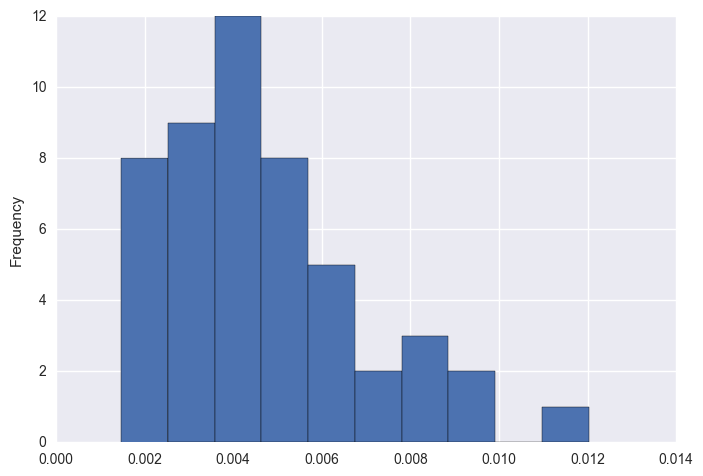

In [333]:
standardised_merged_table["violent_crime"].plot.hist()

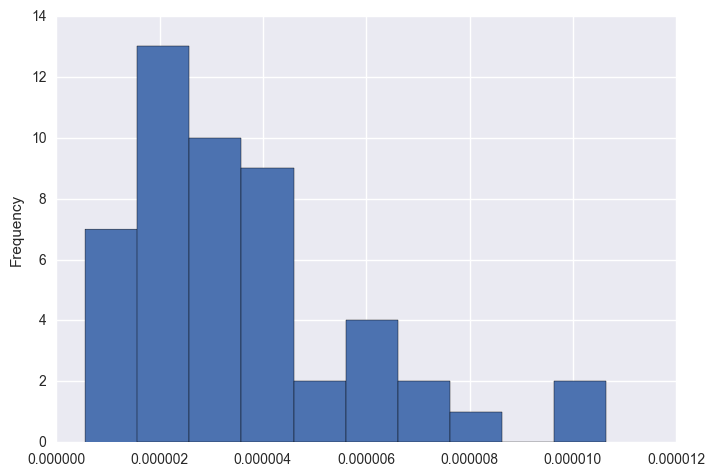

In [335]:
standardised_merged_table["police_shootings"].plot.hist()

Both variables have right-skewed non-normal distribution.

__Scatter plot with total violence explaining police shootings__

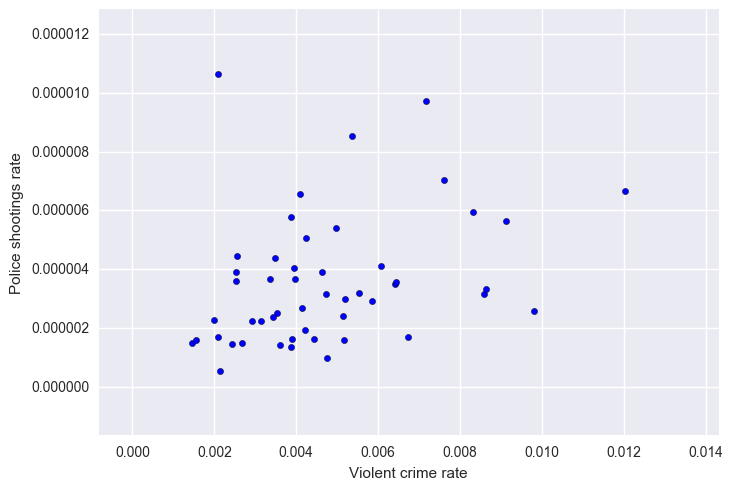

In [321]:
plt.scatter(standardised_merged_table["violent_crime"], standardised_merged_table["police_shootings"])

plt.xlim((min(standardised_merged_table["violent_crime"])-np.std(standardised_merged_table["violent_crime"])), 
         (max(standardised_merged_table["violent_crime"])+np.std(standardised_merged_table["violent_crime"])))
plt.ylim((min(standardised_merged_table["police_shootings"])-np.std(standardised_merged_table["police_shootings"])), 
         (max(standardised_merged_table["police_shootings"])+np.std(standardised_merged_table["police_shootings"])))
plt.xlabel("Violent crime rate")
plt.ylabel("Police shootings rate")

plt.show()

__Statistical Correlation__

The Pearsons coefficient has an assumption of normality, which is not the case for police shooting rates and violent crime rates as we have seen when looking at their distributions. I use the _Spearman rank-order correlation coefficient_.

In [337]:
from scipy.stats import spearmanr, pearsonr

In [332]:
spearmanr(standardised_merged_table.police_shootings,standardised_merged_table.violent_crime)

SpearmanrResult(correlation=0.37546218487394956, pvalue=0.0072129581824911526)

We can see a non-negligeable correlation.

__Models__

In [202]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
Xsc = StandardScaler().fit_transform(standardised_merged_table.drop(["violent_crime","police_shootings"], axis=1))

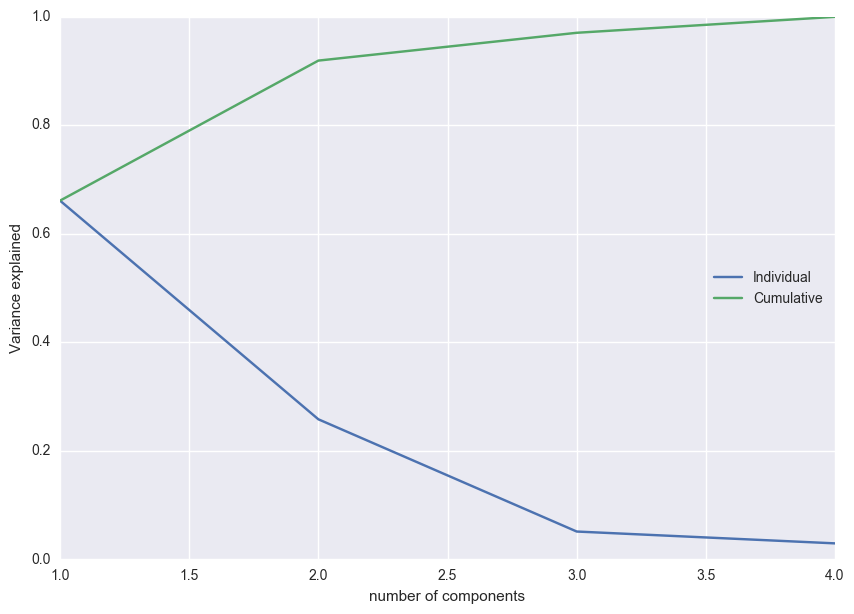

[ 0.66119775  0.91932973  0.97057376  1.        ]


In [323]:
pca = PCA(n_components=4)
new_X = pca.fit_transform(Xsc)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(range(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_, label = 'Individual')
ax.plot(range(1, len(pca.explained_variance_ratio_.cumsum())+1),pca.explained_variance_ratio_.cumsum(), label='Cumulative')

ax.set(xlabel='number of components', ylabel='Variance explained')
plt.legend(loc='center right')
plt.show()
print pca.explained_variance_ratio_.cumsum()

I stuck to 2 components, that explained over 90% of the total variance.

__Results__

_With the total of violent crimes_

In [207]:
y=standardised_merged_table.police_shootings

In [210]:
model=LinearRegression()

print cross_val_score(model, standardised_merged_table.violent_crime.reshape(-1, 1), y, scoring="r2", cv=5)
print np.mean(cross_val_score(model, standardised_merged_table.violent_crime.reshape(-1, 1), y, scoring="r2", cv=5))

[-0.03997454  0.17298661  0.01762065  0.07567779  0.05783132]
0.056828365301


_With PCA components_

In [206]:
pca = PCA(n_components=2)
new_X = pca.fit_transform(Xsc)

In [209]:
print cross_val_score(model, new_X, y, scoring="r2", cv=5)
print np.mean(cross_val_score(model, new_X, y, scoring="r2", cv=5))

[-0.02788727  0.34979848 -0.89099607  0.1296926   0.06345065]
-0.0751883203335


_With the total of murders_

In [212]:
print cross_val_score(model, standardised_merged_table["murder"].reshape(-1, 1), y, scoring="r2", cv=5)
print np.mean(cross_val_score(model, standardised_merged_table["murder"].reshape(-1, 1), y, scoring="r2", cv=5))

[-0.12422882  0.01596023 -0.10265634 -0.16344155  0.03776729]
-0.0673198357043


_With the total of aggravated assaults_

In [216]:
print cross_val_score(model, standardised_merged_table["agg_assault"].reshape(-1, 1), y, scoring="r2", cv=5)
print np.mean(cross_val_score(model, standardised_merged_table["agg_assault"].reshape(-1, 1), y, scoring="r2", cv=5))

[-0.13216845  0.20696463 -0.05609951  0.12487536  0.07069396]
0.0428532003708


_With the total of murders_

In [218]:
print cross_val_score(model, standardised_merged_table["robbery"].reshape(-1, 1), y, scoring="r2", cv=5)
print np.mean(cross_val_score(model, standardised_merged_table["robbery"].reshape(-1, 1), y, scoring="r2", cv=5))

[ 0.00527385 -0.05005805 -0.20161455 -0.0278195   0.03935352]
-0.0469729455758


__Discussion__

The Spearman's coefficient evidenced a 37% (p-value >0.01) correlation between state levels of violent crime and state police killings, but how far I got with the regression results allow me not to show that correlation. The variance was too important for them to withstand cross-validation.

As it was stated, my assumption was that of one-to-one equivalence between reported crime to covered population and real crime to total population. I have since identified that the FBI provides estimates for all states (as stated, I just aggregated by state the raw data I already was working with). This study should therefore be replicated with the FBI provided estimates.

---

---